### Homework 2 : Text Classification

- Use the harry-potter dataset
- Explore the pattern
- Identify the cleaning points
- Conduct text cleaning
- Explore the word and character distribution
- Do you see different patterns from what you observed in the morning?

In [53]:
import pandas as pd
import nltk
import re
from collections import Counter
#Import library and package 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import nltk
from wordcloud import WordCloud
import regex as re
from collections import Counter
import gdown
import matplotlib as mpl

In [2]:
dataset = open('Lecture5_TextClassification\harry_7books.txt', encoding='utf8')
dataset = dataset.read()
tokens = nltk.word_tokenize(dataset) #ทำการ Tokenize เพื่อนำมาเช็ค Pattern

#### Explore the pattern

In [3]:
#ทำการเช็คตัวเลขที่มีความยาวเกิน 5 ตัว เนื่องจากเป็นตัวเลขที่ไม่เกี่ยวข้องกับเนื้อเรื่อง
print([w for w in tokens if re.search('\d{5}', w)])

['10012', '0-439-06486-4', '98-46370', '10012', '2007925449', '978-0-545-02936-0', '0-545-02936-8', '10012', '00-131084', '0-439-13959-7', '10012', '2005921149', '0-439-78454-9', '10012', '2003102525', '0-439-35806-X', '10012', '0-439-13635-0', 'PZ7.R79835Ham', '99-23982', '10012', '0-590-35340-3', 'PZ7.R79835Har', '97-39059']


In [57]:
#ทำการเช็คอักขระพิเศษอื่นๆ
[w for w in tokens if re.search('[^0-9a-zA-Z]+', w)]

['Grandpré',
 'Seán',
 'foul-weather',
 'GrandPré',
 'Cataloging-in-Publication',
 'second-year',
 '0-439',
 '--',
 '98-',
 'dan\xadgling',
 'Smelt\xadings',
 '‘',
 '‘',
 'purple-faced',
 'Un\xadcle',
 'mat\xadter',
 'sleep\xading',
 'four-poster',
 'four\xadteen',
 'top-of-the-line',
 'sum\xadmer',
 'wiz\xadards',
 'horse-faced',
 'bril\xadliant',
 'jet-black',
 'lightning-shaped',
 'par\xadents',
 'un\xadderstanding',
 'some\xadthing',
 'ig\xadnore',
 'ca\xadreer',
 'Un\xadcle',
 'talk\xading',
 'wel\xadcome',
 'sim\xadpering',
 'eight-fifteen',
 'compli\xadments',
 '‘',
 'Petu\xadnia',
 'Ma\xadsons',
 'to\xadmorrow',
 'non\xadsense',
 'arch\xadenemy',
 'face-to-face',
 're\xadgain',
 'won\xaddering',
 'absent-mindedly',
 'c-cant',
 'm-magic',
 'any\xadwhere',
 're\xadpainted',
 'run\xadning',
 'siz\xadzling',
 'salmon-pink',
 'jack\xadets',
 'door\xadbell',
 'bat-like',
 'arm-',
 'leg-holes',
 'high-pitched',
 'Th-thank',
 'house-elf',
 'crea\xadture',
 'house-elf',
 'be\xadgin',
 '

In [5]:
print([w for w in tokens if re.search('noo+$', w)])

['nooooo']


In [6]:
#print([w for w in tokens if re.search('[@_!#$%^&*()<>?/\|}{~:©…—]', w)])

#### Identify the cleaning points

Cleaning point in dataset : \xad | \n | @_!#$%^&*()<>?/\|}{~:…—© | [] | noo | Long number

#### Conduct Cleanning

In [7]:
data = dataset.replace('\xad', '')
data = dataset.replace('\u00ad', '')
data = dataset.replace('\N{SOFT HYPHEN}', '')
data = dataset.replace('\n',' ')
data = re.sub('[’@_!#$%^&*()<>?/\|}{~:…—©''"".“;”,]', '', data)
data = data.replace('[','')
data = data.replace(']','')
data = re.sub('noo+$','',data)
data = re.sub('\d{5}','',data)

In [8]:
#data

#### Tokenization

In [9]:
from nltk.tokenize import sent_tokenize
sentence_tokenize = sent_tokenize(data) #ตัดคำแบบประโยค

In [10]:
#sentence_tokenize (ตัดคำประโยค)

In [11]:
tokens = nltk.word_tokenize(data)

In [12]:
tokens_1 = [w.replace('[@_!#$%^&*()<>?/\|}{~:…—©''."]','') for w in tokens]

In [13]:
tokens_1 = [w.replace('\xad','') for w in tokens]

In [14]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [15]:
tokens_4 = [w for w in tokens_1 if not w in stop_words]

In [16]:
#porter = nltk.PorterStemmer()
#tokens_4 = [porter.stem(t) for t in tokens_4]

In [17]:
def ngrams2(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [18]:
token_bigram = ngrams2(tokens_4)

In [19]:
def count_words(df, column='Tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'Words'
    
    return freq_df.sort_values('freq', ascending=False)

In [20]:
df = pd.DataFrame({'Tokens': [tokens_4]})
df.head()

,Tokens
0,"[Harry, Potter, Chamber, Secrets, J, K, Rowlin..."


In [21]:
df2 = pd.DataFrame({'Tokens': [token_bigram]})
df2.head()

,Tokens
0,"[Harry Potter, Potter Chamber, Chamber Secrets..."


In [22]:
freq_df1 = count_words(df)
freq_df1.head(10)

,freq
Words,
Harry,16745
said,14473
I,10454
Ron,5817
He,5608
Hermione,4985
The,4022
back,3192
Dumbledore,2890


In [23]:
freq_df2 = count_words(df2)
freq_df2.head()

,freq
Words,
said Harry,2706
said Ron,1579
said Hermione,1284
Ron Hermione,759
I dont,695


In [24]:
tokens_pos = nltk.pos_tag(tokens_4)

In [25]:
tokens_pos2 = nltk.pos_tag(token_bigram)
tokens_pos2

[('Harry Potter', 'NNP'),
 ('Potter Chamber', 'NNP'),
 ('Chamber Secrets', 'NNP'),
 ('Secrets J', 'NNP'),
 ('J K', 'NNP'),
 ('K Rowling', 'NNP'),
 ('Rowling Illustrations', 'NNP'),
 ('Illustrations Mary', 'NNP'),
 ('Mary Grandpré', 'NNP'),
 ('Grandpré Arthur', 'NNP'),
 ('Arthur A', 'NNP'),
 ('A Levine', 'NNP'),
 ('Levine Books', 'NNP'),
 ('Books An', 'NNP'),
 ('An Imprint', 'NNP'),
 ('Imprint Of', 'NNP'),
 ('Of Scholastic', 'NNP'),
 ('Scholastic Press', 'NNP'),
 ('Press For', 'NNP'),
 ('For Seán', 'NNP'),
 ('Seán P', 'NNP'),
 ('P F', 'NNP'),
 ('F Harris', 'NNP'),
 ('Harris Getaway', 'NNP'),
 ('Getaway driver', 'NNP'),
 ('driver foul-weather', 'JJ'),
 ('foul-weather friend', 'JJ'),
 ('friend Text', 'NN'),
 ('Text copyright', 'NNP'),
 ('copyright 1999', 'VBZ'),
 ('1999 J', 'CD'),
 ('J K', 'NNP'),
 ('K Rowling', 'NNP'),
 ('Rowling Illustrations', 'NNP'),
 ('Illustrations Mary', 'NNP'),
 ('Mary GrandPré', 'NNP'),
 ('GrandPré copyright', 'NNP'),
 ('copyright 1999', 'VBZ'),
 ('1999 Warner', 

In [26]:
tokens_pos

[('Harry', 'NNP'),
 ('Potter', 'NNP'),
 ('Chamber', 'NNP'),
 ('Secrets', 'NNP'),
 ('J', 'NNP'),
 ('K', 'NNP'),
 ('Rowling', 'NNP'),
 ('Illustrations', 'NNP'),
 ('Mary', 'NNP'),
 ('Grandpré', 'NNP'),
 ('Arthur', 'NNP'),
 ('A', 'NNP'),
 ('Levine', 'NNP'),
 ('Books', 'NNP'),
 ('An', 'DT'),
 ('Imprint', 'NNP'),
 ('Of', 'IN'),
 ('Scholastic', 'NNP'),
 ('Press', 'NNP'),
 ('For', 'IN'),
 ('Seán', 'NNP'),
 ('P', 'NNP'),
 ('F', 'NNP'),
 ('Harris', 'NNP'),
 ('Getaway', 'NNP'),
 ('driver', 'IN'),
 ('foul-weather', 'JJ'),
 ('friend', 'NN'),
 ('Text', 'NNP'),
 ('copyright', 'NN'),
 ('1999', 'CD'),
 ('J', 'NNP'),
 ('K', 'NNP'),
 ('Rowling', 'NNP'),
 ('Illustrations', 'NNP'),
 ('Mary', 'NNP'),
 ('GrandPré', 'NNP'),
 ('copyright', 'NN'),
 ('1999', 'CD'),
 ('Warner', 'NNP'),
 ('Bros', 'NNP'),
 ('All', 'NNP'),
 ('rights', 'NNS'),
 ('reserved', 'VBN'),
 ('Published', 'NNP'),
 ('Scholastic', 'NNP'),
 ('Press', 'NNP'),
 ('division', 'NN'),
 ('Scholastic', 'NNP'),
 ('Inc', 'NNP'),
 ('Publishers', 'NNP'),
 (

In [27]:
from wordcloud import WordCloud
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [28]:
import matplotlib.pyplot as plt

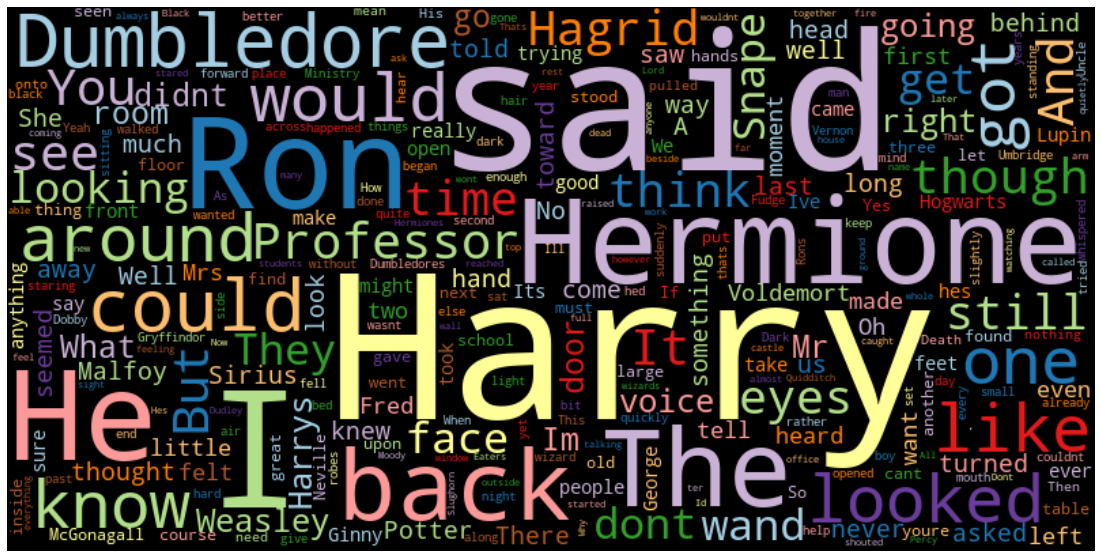

In [29]:
fig = plt.figure(figsize = (20, 10))
wordcloud(freq_df1['freq'], max_words=300)


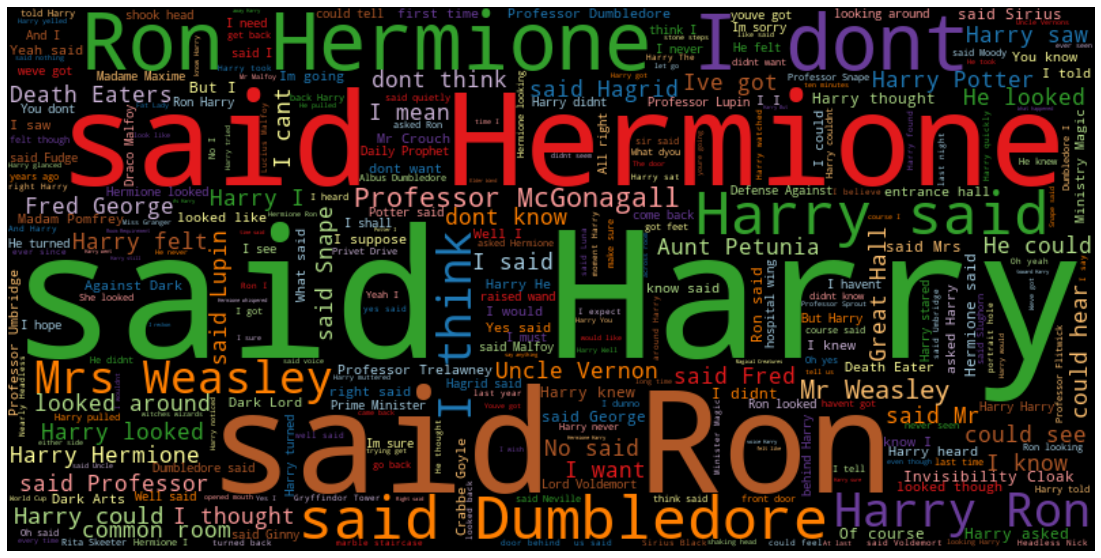

In [30]:
fig = plt.figure(figsize = (20, 10))
wordcloud(freq_df2['freq'], max_words=300)

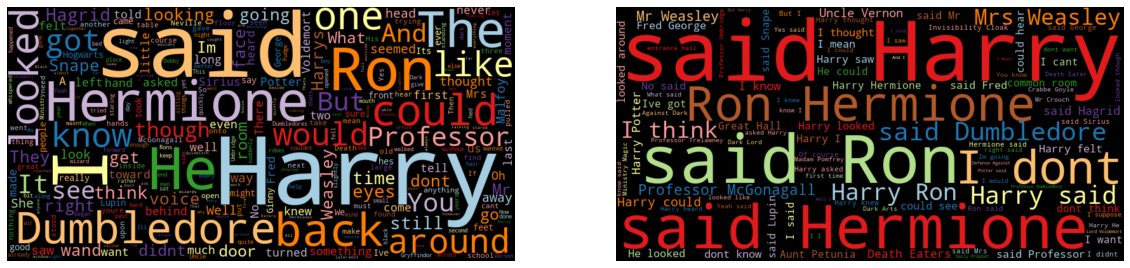

In [31]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
wordcloud(freq_df1['freq'], max_words=300)
ax2 = plt.subplot(1,2,2)
wordcloud(freq_df2['freq'], max_words=100)

In [32]:
#Check len in chapter
data_chapeter = data.split('Chapter ')

In [33]:
df_chapeter = pd.DataFrame({'Chapter': data_chapeter})

In [34]:
df_chapeter 

,Chapter
0,Harry Potter and the Chamber of Secrets ...
1,1 The Worst Birthday Not for the firs...
2,2 Dobbys Warning Harry managed not to...
3,3 The Burrow Ron breathed Harry creep...
4,4 At Flourish and Blotts Life at the ...
...,...
194,13 Nicholas Flamel Dumbledore had con...
195,14 Norbert the Norwegian Ridgeback Qu...
196,15 The Forbidden Forest Things couldn...
197,16 Through the Trapdoor In years to c...


In [35]:
df_chapeter['length']= df_chapeter['Chapter'].map(len)

In [36]:
df_chapeter

,Chapter,length
0,Harry Potter and the Chamber of Secrets ...,1608
1,1 The Worst Birthday Not for the firs...,14049
2,2 Dobbys Warning Harry managed not to...,15588
3,3 The Burrow Ron breathed Harry creep...,23837
4,4 At Flourish and Blotts Life at the ...,31554
...,...,...
194,13 Nicholas Flamel Dumbledore had con...,17480
195,14 Norbert the Norwegian Ridgeback Qu...,18579
196,15 The Forbidden Forest Things couldn...,27478
197,16 Through the Trapdoor In years to c...,34363


<AxesSubplot:>

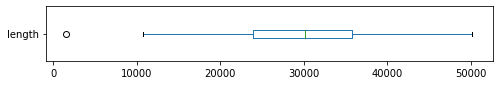

In [37]:
df_chapeter['length'].plot(kind='box', vert=False, figsize=(8, 1))


<AxesSubplot:ylabel='Frequency'>

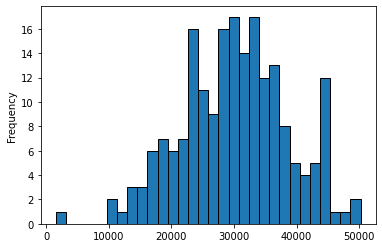

In [38]:
df_chapeter['length'].plot(kind='hist', bins=30, figsize=(6, 4), edgecolor='k')

<AxesSubplot:>

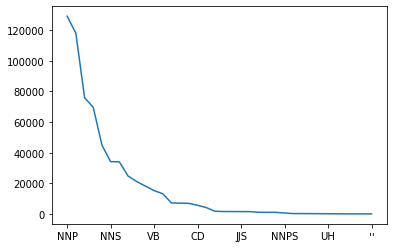

In [56]:
Pos_df = pd.DataFrame(tokens_pos)
Pos_df[1].value_counts(ascending=False).plot()

<AxesSubplot:>

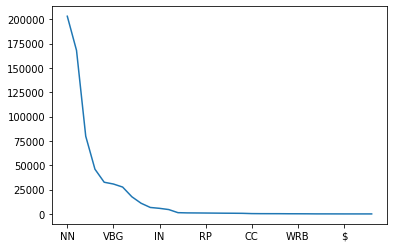

In [54]:
Posbigram_df = pd.DataFrame(tokens_pos2)
Posbigram_df[1].value_counts(ascending=False).plot()